<a href="https://colab.research.google.com/github/EmmanuelChinkaka/GEOG271/blob/main/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.5 MB/s 
     |████████████████████████████████| 16.6 MB 53.0 MB/s 
     |████████████████████████████████| 7.8 MB 52.2 MB/s 


In [ ]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 13.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.9 MB 58.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 67.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 51.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 58.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 58.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |███████

In [ ]:
##Install and import all the required packages in Pythonpackages for the Python Project.
#import geoplot as gplt
import geopandas as gpd

In [ ]:
#import geoplot.crs as gcrs
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import imageio

In [ ]:
#connecting to the google drive and getting the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read spatial data as shapefile- Karnataka Districts
Kar = gpd.read_file("/content/drive/MyDrive/W23-GEOG271/COVID Modelling/Kar_Districts/Karnataka_dist_final.shp")
Kar.head()

,KeyID,OBJECTID,Shape_Leng,Shape_Area,Dist_numbe,Dist_Name,Cases,Population,Elderly,NDVI,geometry
0,1,0,7.209818e+09,7.209818e+09,17,Chikkamagaluru,10098.0,44555.0,589.0,0.20,"POLYGON ((646368.928 1501649.279, 646419.356 1..."
1,1,0,4.251288e+09,4.251288e+09,29,Chikkaballapura,345.0,6778.0,123.0,0.69,"POLYGON ((845727.186 1501783.909, 846421.234 1..."
2,1,0,5.639345e+09,5.639345e+09,27,Chamarajanagara,56.0,456.0,12.0,0.56,"POLYGON ((752250.808 1361335.689, 752225.480 1..."
3,1,0,5.453491e+09,5.453491e+09,5,Bidar,777.0,8900.0,455.0,0.50,"MULTIPOLYGON (((767717.940 1968293.755, 767760..."
4,1,0,2.195914e+09,2.195914e+09,20,Bengaluru (Urban),875.0,990.0,34.0,0.69,"MULTIPOLYGON (((777128.955 1415825.254, 777114..."


In [ ]:
Kar.describe

<bound method NDFrame.describe of     KeyID  OBJECTID    Shape_Leng    Shape_Area  Dist_numbe  \
0       1         0  7.209818e+09  7.209818e+09          17   
1       1         0  4.251288e+09  4.251288e+09          29   
2       1         0  5.639345e+09  5.639345e+09          27   
3       1         0  5.453491e+09  5.453491e+09           5   
4       1         0  2.195914e+09  2.195914e+09          20   
5       1         0  2.300575e+09  2.300575e+09          21   
6       1         0  1.339915e+10  1.339915e+10           1   
7       1         0  9.892029e+09  9.892029e+09          12   
8       1         0  6.562017e+09  6.562017e+09           2   
9       1         0  1.097246e+10  1.097246e+10           4   
10      1         0  4.817819e+09  4.817819e+09          11   
11      1         0  6.818153e+09  6.818153e+09          23   
12      1         0  4.655321e+09  4.655321e+09           8   
13      1         0  4.254866e+09  4.254866e+09           9   
14      1         0  

In [ ]:
Kar.shape

(30, 11)

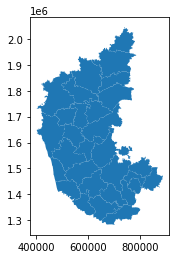

In [ ]:
# Basic plot,
Kar.plot()

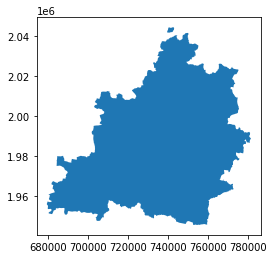

In [ ]:
# Individual district plot
Kar[Kar.Dist_Name =="Bidar"].plot()

In [ ]:
Kar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KeyID       30 non-null     int64   
 1   OBJECTID    30 non-null     int64   
 2   Shape_Leng  30 non-null     float64 
 3   Shape_Area  30 non-null     float64 
 4   Dist_numbe  30 non-null     int64   
 5   Dist_Name   30 non-null     object  
 6   Cases       30 non-null     float64 
 7   Population  30 non-null     float64 
 8   Elderly     30 non-null     float64 
 9   NDVI        30 non-null     float64 
 10  geometry    30 non-null     geometry
dtypes: float64(6), geometry(1), int64(3), object(1)
memory usage: 2.7+ KB


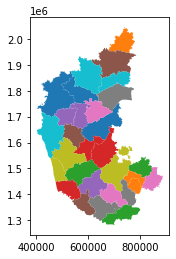

In [ ]:
# Plot by Dist_name, Random colors
Kar.plot(column='Dist_Name')

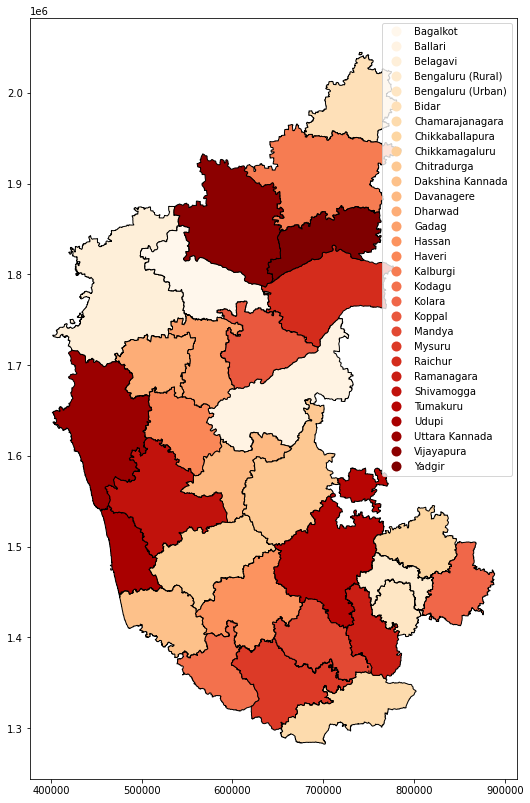

In [ ]:
## Standard Map layout with legend

ax = Kar.plot(column = Kar.Dist_Name,
            cmap = 'OrRd',
            figsize =(25,14),
            legend = True,
            #legend_kwds ={'label': "COVID-19 cases", 'orientation' : "vertical"},
            edgecolor = 'black')
            #linewidth = 0.8) 

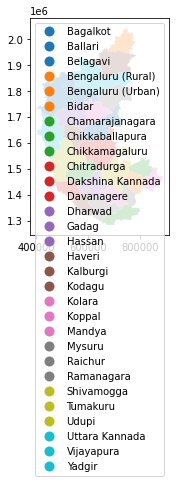

In [ ]:
#Plot Dist name with an accurate legend
fig, ax = plt.subplots(1, 1)

Kar.plot(column='Dist_Name', ax=ax, legend=True)

Text(0.5, 1.0, 'Total COVID19 Cases in Karnataka, Cases in 2020')

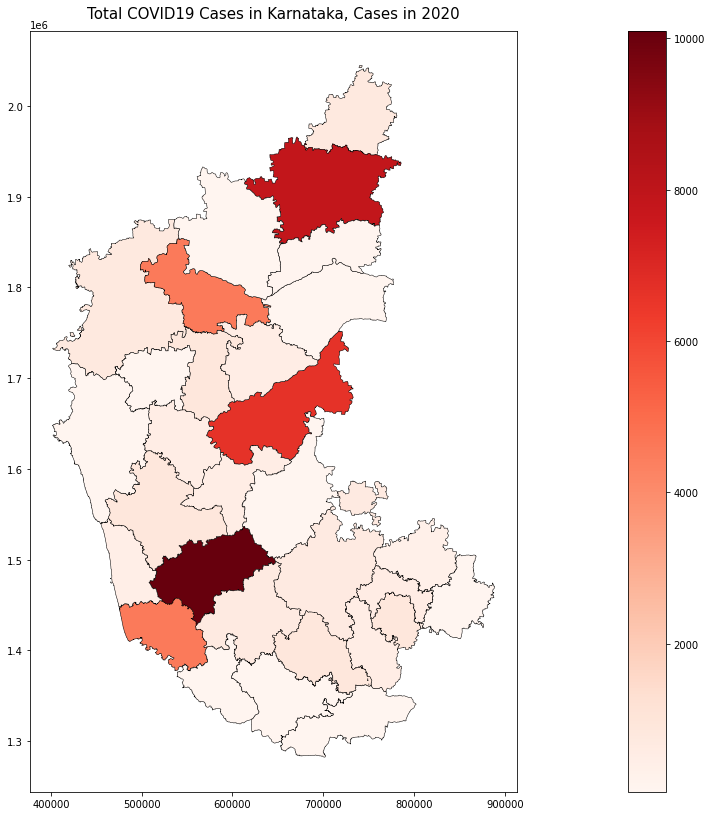

In [ ]:
#  Resize figure and adjusting Map layout the axes
ax = Kar.plot(column =('Cases'),
                 cmap = 'Reds',
                 figsize =(40,14),
                 ax=ax[0,0],
                 legend = True,
                 edgecolor = 'black',
                 linewidth = 0.5)
ax.set_title ('Total COVID19 Cases in Karnataka, '+ (('Cases') + ' in 2020'), fontdict= 
                 {'fontsize': 15}, pad = 12.5)

Text(0.5, 1.0, 'Total Population in Karnataka, Population in 2020')

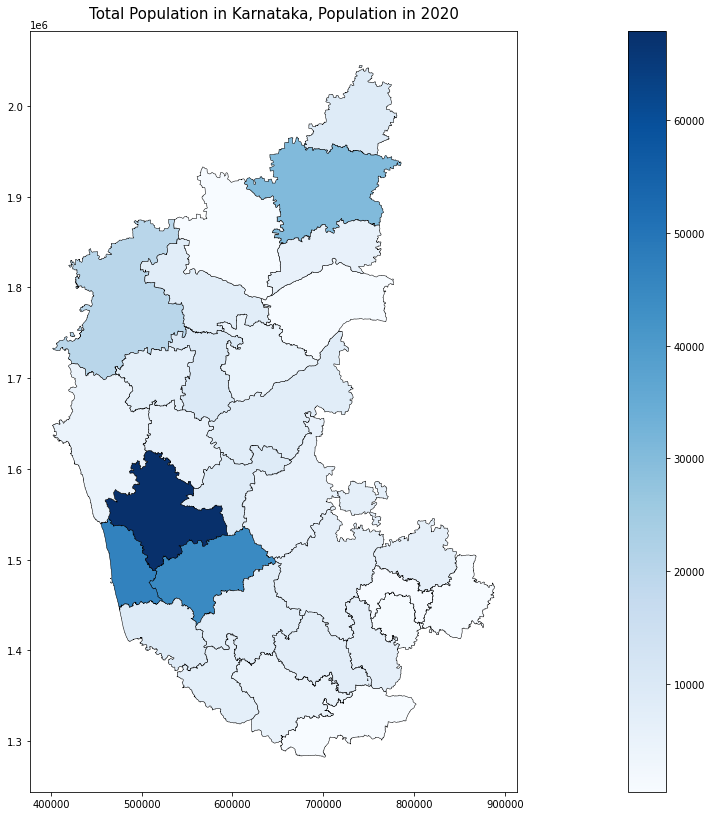

In [ ]:
#  Resize figure and adjusting Map layout the axes
ax = Kar.plot(column =('Population'),
                 cmap = 'Blues',
                 figsize =(40,14),
                 ax=ax[0,1],
                 legend = True,
                 edgecolor = 'black',
                 linewidth = 0.5)
ax.set_title ('Total Population in Karnataka, '+ (('Population') + ' in 2020'), fontdict= 
                 {'fontsize': 15}, pad = 12.5)

[]

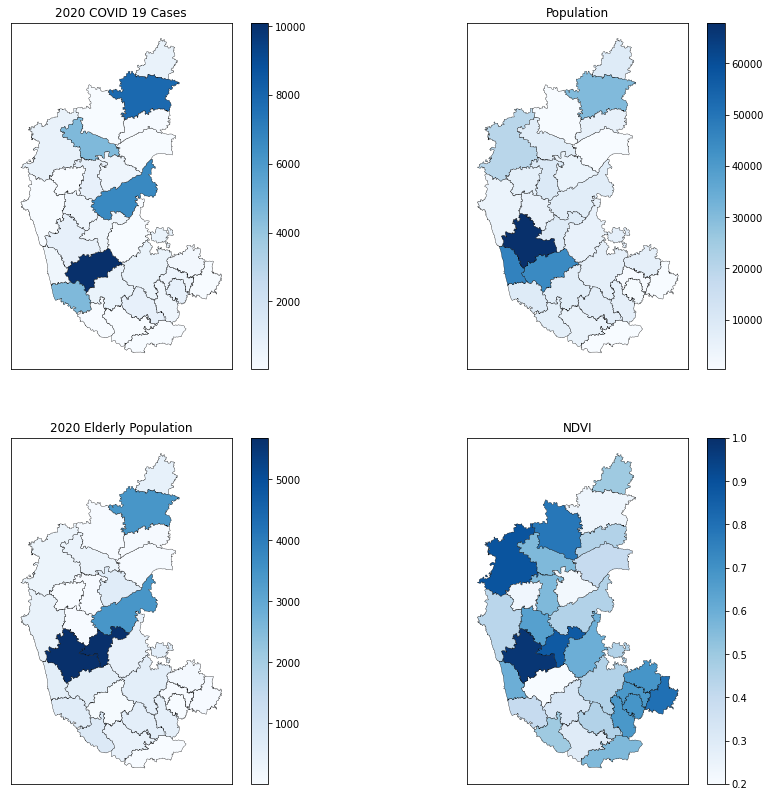

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 14))
Kar.plot('Cases', ax=ax[0,0], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[0,0].set_title("2020 COVID 19 Cases")
Kar.plot('Population', ax=ax[0,1], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[0,1].set_title("Population")
Kar.plot('Elderly', ax=ax[1,0], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[1,0].set_title("2020 Elderly Population")
Kar.plot('NDVI', ax=ax[1,1], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True, vmax=1)
ax[1,1].set_title("NDVI")

ax[0,0].set_yticks([])
ax[0,1].set_yticks([])
ax[1,0].set_yticks([])
ax[1,1].set_yticks([])
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])
     

In [ ]:
#Number of cases per sq foot by census tract
from shapely.geometry import Polygon, LineString, Point

print(Kar.crs)

#EPSG:4326 has lat and lon in degree. Lets change it to Feet
s = Kar.to_crs("EPSG:6565")
print(s.crs)
#calculating area and adding it to the orighical geodataframe
Kar["area_ft"] = s.area

#tree density
Kar["cases_density"] = Kar["Cases"]/Kar["area_ft"]

epsg:32643
EPSG:6565


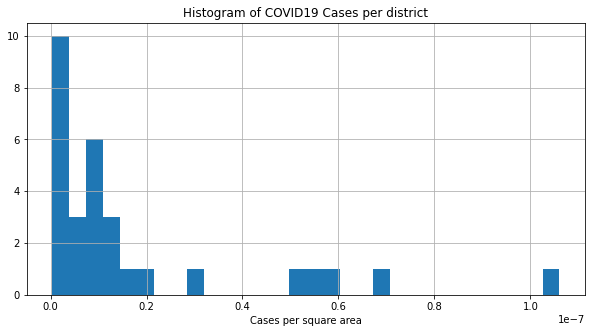

In [ ]:
#plotting histogram
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Histogram of COVID19 Cases per district")

ax = Kar.cases_density.hist(bins=30)
ax.set_xlabel("Cases per square area")
fig.show()

In [ ]:
#Clipping the variables that will be used in the modelling based on the influence in the modelling
Kar_subset = Kar[['Population', 'Cases', 'Elderly', 'NDVI','geometry']]
Kar_subset.head()

,Population,Cases,Elderly,NDVI,geometry
0,44555.0,10098.0,589.0,0.20,"POLYGON ((646368.928 1501649.279, 646419.356 1..."
1,6778.0,345.0,123.0,0.69,"POLYGON ((845727.186 1501783.909, 846421.234 1..."
2,456.0,56.0,12.0,0.56,"POLYGON ((752250.808 1361335.689, 752225.480 1..."
3,8900.0,777.0,455.0,0.50,"MULTIPOLYGON (((767717.940 1968293.755, 767760..."
4,990.0,875.0,34.0,0.69,"MULTIPOLYGON (((777128.955 1415825.254, 777114..."


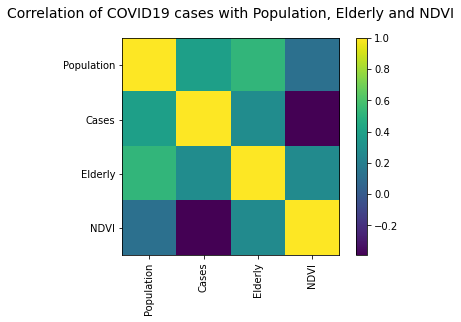

In [ ]:
#Running the correction model
plt.imshow(Kar_subset.corr())
plt.xticks(range(len(Kar_subset.corr())), Kar_subset.corr().columns, rotation='vertical')
plt.yticks(range(len(Kar_subset.corr())), Kar_subset.corr().columns)
plt.title("Correlation of COVID19 cases with Population, Elderly and NDVI", fontsize = 14, pad=20)
plt.colorbar();

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/W23-GEOG271/COVID Modelling/covid.csv')
data.head()
     

,FID,KeyID,OBJECTID,Shape_Leng,Shape_Area,Dist_numbe,Dist_Name,Cases,Population,Elderly,NDVI,Unnamed: 11
0,0,1,0,7209818165,7209818165,17,Chikkamagaluru,10098,44555,589,0.20,NaN
1,1,1,0,4251288021,4251288021,29,Chikkaballapura,345,6778,123,0.69,NaN
2,2,1,0,5639345411,5639345411,27,Chamarajanagara,56,456,12,0.56,NaN
3,3,1,0,5453490506,5453490506,5,Bidar,777,8900,455,0.50,NaN
4,4,1,0,2195913678,2195913678,20,Bengaluru,(Urban),875,990,34.00,0.69


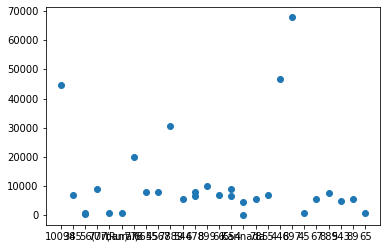

In [ ]:
#importing library
import matplotlib.pyplot as plt
#datasets

#scatter plot for the dataset
plt.scatter(data['Cases'], data['Population'])
plt.show()



In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
heat.plot("num_trees", "HVI_SCORE", kind="scatter",ax=ax[0])
ax[0].set_xlabel("number of trees per census tract")
ax[0].set_ylabel("Heat Vulnerability Index")
heat.plot("ave_dbh", "HVI_SCORE", kind="scatter", ax=ax[1])
ax[1].set_xlabel("average diameter of trees")
ax[1].set_ylabel("Heat Vulnerability Index")
ax[0].set_title('Trees per Census Tract')
ax[1].set_title('Average Diameter of Trees per Census Tract')


fig.show()